#Prerequisites


## Import Libraries
Import required libraries for prerequisites.

In [1]:
from google.colab import files
import pandas as pd
import io

##Import Data
Upload file, read data from csv file into dataset variable.

In [2]:
uploaded = files.upload()

data_set = pd.read_csv(io.BytesIO(uploaded['SAKI Exercise 1 - Transaction Classification - Data Set.csv']), sep=';')

Saving SAKI Exercise 1 - Transaction Classification - Data Set.csv to SAKI Exercise 1 - Transaction Classification - Data Set (2).csv


## Raw data evaluation

Data set, shape and recognized datatypes are displayed. 


In [3]:
print(data_set)
print(data_set.shape)
print(data_set.dtypes)

     Unnamed: 0  Auftragskonto Buchungstag  ...    Betrag Waehrung             label
0             0     89990201.0  28.07.2016  ...   2000.00      EUR            income
1             1     89990201.0  27.07.2016  ...   -670.00      EUR            living
2             2     89990201.0  21.07.2016  ...    -70.00      EUR           private
3             3     89990201.0  20.07.2016  ...    -73.21      EUR  standardOfLiving
4             4     89990201.0  18.07.2016  ...      -363      EUR           leisure
..          ...            ...         ...  ...       ...      ...               ...
204         204            NaN  15.02.2016  ...    200.00      EUR           finance
205         205            NaN  02.02.2016  ...   -300.00      EUR           finance
206         206            NaN  28.01.2016  ...   2000.00      EUR            income
207         207            NaN  28.01.2016  ...  -4000.00      EUR           finance
208         208     89990210.0  08.01.2016  ...     -51,2      EU

#Manual data preprocessing

##Data manipulation
Column "Betrag" is recognized as data type Object. For later classification this column should be processed as a numeric feature, therefor a data type conversion is conducted. 

Data is printed out for verification of the applied functions. 

In [4]:
data_set["Betrag"] = data_set["Betrag"].str.replace(",", ".").astype(float)

In [5]:
print(data_set)
print(data_set.shape)
print(data_set.dtypes)

     Unnamed: 0  Auftragskonto Buchungstag  ...   Betrag Waehrung             label
0             0     89990201.0  28.07.2016  ...  2000.00      EUR            income
1             1     89990201.0  27.07.2016  ...  -670.00      EUR            living
2             2     89990201.0  21.07.2016  ...   -70.00      EUR           private
3             3     89990201.0  20.07.2016  ...   -73.21      EUR  standardOfLiving
4             4     89990201.0  18.07.2016  ...  -363.00      EUR           leisure
..          ...            ...         ...  ...      ...      ...               ...
204         204            NaN  15.02.2016  ...   200.00      EUR           finance
205         205            NaN  02.02.2016  ...  -300.00      EUR           finance
206         206            NaN  28.01.2016  ...  2000.00      EUR            income
207         207            NaN  28.01.2016  ... -4000.00      EUR           finance
208         208     89990210.0  08.01.2016  ...   -51.20      EUR           

## Identify missing values
Values in column “Betrag” have different decimal separators. As only decimal separators are present in this column all comma separator are replaced by point separators. 
The function isna() returns, if a value is not or NaN and can be summed up to get the number of missing values per column. 
Data is printed out for verification of the applied functions.

In [6]:
data_set.isna().sum()

Unnamed: 0                            0
Auftragskonto                        41
Buchungstag                           0
Valutadatum                           0
Buchungstext                          0
Verwendungszweck                      0
Beguenstigter/Zahlungspflichtiger     0
Kontonummer                           1
BLZ                                   1
Betrag                                0
Waehrung                              0
label                                 0
dtype: int64

In [7]:
data_set['Auftragskonto'] = data_set['Auftragskonto'].fillna(89990210.0)
data_set['Kontonummer'] = data_set['Kontonummer'].fillna('Unknown')
data_set['BLZ'] = data_set['BLZ'].fillna('Unknown')
data_set.isna().sum()

Unnamed: 0                           0
Auftragskonto                        0
Buchungstag                          0
Valutadatum                          0
Buchungstext                         0
Verwendungszweck                     0
Beguenstigter/Zahlungspflichtiger    0
Kontonummer                          0
BLZ                                  0
Betrag                               0
Waehrung                             0
label                                0
dtype: int64

##Reshaping
Reshaping data set to X and Y sets. 
Shapes of newly created data set is printed, to verify successful slicing.Unique Classes are printed. 

In [8]:
X = data_set.iloc[:,:11]
Y = data_set.iloc[:,11]


print('Data_Set Shape: ', data_set.shape)
print('X Shape: ', X.shape)
print('Y Shape: ', Y.shape)
print('Y_Classes', Y.unique())


Data_Set Shape:  (209, 12)
X Shape:  (209, 11)
Y Shape:  (209,)
Y_Classes ['income' 'living' 'private' 'standardOfLiving' 'leisure' 'finance']


#Gaussian Naive Bayes

Import required libraries for Gaussian Naive Bayes.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

gnb = GaussianNB()

##Comparing OrdinalEncoder() to OneHotEncoder()
Both functions are implemented and validated against accuracy and weighted F1-Score to compare which encoder algorithm supports better classification of the data. For simplification reasons all features are handled at this stage as categorical features.

### Calculating results for OrdinalEncoder()

In [10]:
enc = OrdinalEncoder()
ord_enc = enc.fit_transform(X)

#Split into Test and Training data set
#Fit the classifier
# Predict y_pred based on X_test
X_train, X_test, y_train, y_test = train_test_split(ord_enc, Y, test_size=0.2, random_state=42)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

#Result evaluation
print("Model Score: %.3f" % gnb.score(X_test, y_test))
print('Accuracy Score: %.3f' % metrics.balanced_accuracy_score(y_test, y_pred))
print('F1 Score weighted: %.3f' % metrics.f1_score(y_test, y_pred, average = 'weighted'))

Model Score: 0.690
Accuracy Score: 0.714
F1 Score weighted: 0.693


### Calculating results for OneHotEncoder()


In [11]:
#capture categorical features in list and name transformer
categorical_features = ['Auftragskonto','Buchungstag','Valutadatum','Buchungstext','Verwendungszweck','Beguenstigter/Zahlungspflichtiger', 'Kontonummer', 'BLZ', 'Betrag', 'Waehrung']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#built preprocessor 
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)],sparse_threshold=0)

#Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])

#Split into Test and Training data set
#Fit the classifier
# Predict y_pred based on X_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Result evaluation
print("Model Score: %.3f" % clf.score(X_test, y_test))
print('Accuracy Score: %.3f' % metrics.balanced_accuracy_score(y_test, y_pred))
print('F1 Score weighted: %.3f' % metrics.f1_score(y_test, y_pred, average = 'weighted'))

Model Score: 0.952
Accuracy Score: 0.952
F1 Score weighted: 0.952


##OneHotEncoder()

##Categorical and Numeric Features

Transforming column "Betrag" as a numeric feature instead of a categorical feature.

model score: 0.952
Accuracy Score: 0.952
F1 Score weighted: 0.952
_______
                  precision    recall  f1-score   support

         finance       1.00      1.00      1.00         6
          income       1.00      1.00      1.00         4
         leisure       1.00      1.00      1.00        12
          living       0.80      0.80      0.80         5
         private       1.00      1.00      1.00         4
standardOfLiving       0.91      0.91      0.91        11

        accuracy                           0.95        42
       macro avg       0.95      0.95      0.95        42
    weighted avg       0.95      0.95      0.95        42



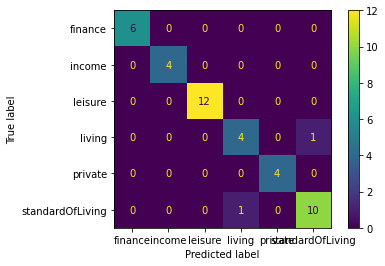

In [12]:
#capture numeric features in list and name transformer
numeric_features = ['Betrag']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

#capture categorical features in list and name transformer
categorical_features = ['Auftragskonto','Buchungstag','Valutadatum','Buchungstext','Verwendungszweck','Beguenstigter/Zahlungspflichtiger', 'Kontonummer', 'BLZ', 'Waehrung']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#built preprocessor 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)],sparse_threshold=0)

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])

#Split into Test and Training data set
#Fit the classifier
# Predict y_pred based on X_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Result evaluation
print("model score: %.3f" % clf.score(X_test, y_test))
print('Accuracy Score: %.3f' % metrics.balanced_accuracy_score(y_test, y_pred))
print('F1 Score weighted: %.3f' % metrics.f1_score(y_test, y_pred, average = 'weighted'))
metrics.plot_confusion_matrix(clf,X_test,y_test)
plt.show
print('_______')
print(metrics.classification_report(y_test,y_pred))


##Drop Date Columns

model score: 1.000
Accuracy Score: 1.000
F1 Score weighted: 1.000
_______
                  precision    recall  f1-score   support

         finance       1.00      1.00      1.00         6
          income       1.00      1.00      1.00         4
         leisure       1.00      1.00      1.00        12
          living       1.00      1.00      1.00         5
         private       1.00      1.00      1.00         4
standardOfLiving       1.00      1.00      1.00        11

        accuracy                           1.00        42
       macro avg       1.00      1.00      1.00        42
    weighted avg       1.00      1.00      1.00        42



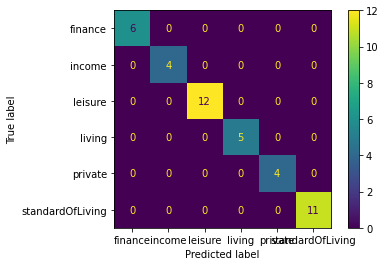

In [13]:
#capture numeric features in list and name transformer
numeric_features = ['Betrag']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

#capture categorical features in list and name transformer
categorical_features = ['Auftragskonto','Buchungstext','Verwendungszweck','Beguenstigter/Zahlungspflichtiger', 'Kontonummer', 'BLZ', 'Waehrung']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#built preprocessor 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)],sparse_threshold=0)

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])

#Split into Test and Training data set
#Fit the classifier
# Predict y_pred based on X_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Result evaluation
print("model score: %.3f" % clf.score(X_test, y_test))
print('Accuracy Score: %.3f' % metrics.balanced_accuracy_score(y_test, y_pred))
print('F1 Score weighted: %.3f' % metrics.f1_score(y_test, y_pred, average = 'weighted'))
metrics.plot_confusion_matrix(clf,X_test,y_test)
plt.show
print('_______')
print(metrics.classification_report(y_test,y_pred))

## Distribution of data across labels 

In [14]:
print(Counter(Y))

Counter({'leisure': 65, 'standardOfLiving': 47, 'finance': 33, 'living': 26, 'private': 21, 'income': 17})
